In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install  mtcnn
!pip install keras_vggface keras_applications

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input
from scipy.spatial.distance import cosine
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [ ]:
!pip install facenet-pytorch
from facenet_pytorch import InceptionResnetV1

# Initialize the Facenet model
facenet_model = InceptionResnetV1(pretrained='vggface2').eval()
model=facenet_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.8 MB/s eta 0:00:00


  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Testing')
path='/content/drive/MyDrive/Testing'

In [ ]:
img=cv2.imread("/content/drive/MyDrive/Testing/IMG_2172.jpeg")
import matplotlib.pyplot as plt

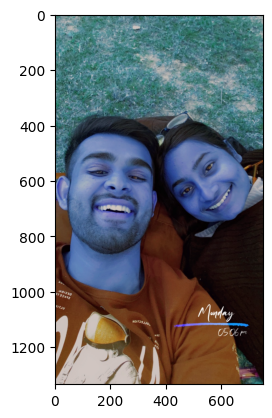

In [ ]:
plt.imshow(img)

In [ ]:
input_folder = path  # Replace "input_folder" with the actual folder path containing the images
output_folder = "/content/drive/MyDrive/New"  # Replace "output_folder" with the desired folder path to save the converted images

# Iterate over files in the input folder
for filename in os.listdir(input_folder):
    # Check if the file is an image (optional)
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Create the full file paths
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Load the image in BGR format
        image_bgr = cv2.imread(input_path)

        # Check if the image was loaded successfully
        if image_bgr is not None:
            # Convert BGR image to RGB
            image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

            # Save the converted image
            cv2.imwrite(output_path, image_rgb)

            print(f"Image {filename} converted and saved.")
        else:
            print(f"Error: Failed to load {filename}.")

#accessing the paths in a list
img_list=[]
for i in os.listdir(output_folder):
  img=os.path.join(output_folder,i)
  #image=cv2.imread(img)
  img_list.append(img)
img_list


Image IMG_6693.jpeg converted and saved.
Image IMG_6694.jpeg converted and saved.
Image 98ddf266-4372-409a-bc87-0f596dfad66e.jpeg converted and saved.
Image 8688bd55-195c-4c87-a014-1487f14c7cc2.jpeg converted and saved.
Image IMG_6544.jpeg converted and saved.
Image IMG_6278.jpeg converted and saved.
Image IMG_7143.jpeg converted and saved.
Image 23dd169e-5578-4d27-ba6a-8c6e9b8b9364.jpeg converted and saved.
Image 9b883602-a920-44fb-9454-8f0b90998768.jpeg converted and saved.
Image IMG_5043.jpeg converted and saved.
Image 2bfb2b9f-6121-407c-a24b-d55d0d916e3c.jpeg converted and saved.
Image IMG_3054.jpeg converted and saved.
Image IMG_2837.jpeg converted and saved.
Image IMG_2229.jpeg converted and saved.
Image IMG_2221.jpeg converted and saved.
Image IMG_2172.jpeg converted and saved.
Image IMG_1979.jpeg converted and saved.
Image IMG_3124.jpeg converted and saved.
Image IMG_1736.jpeg converted and saved.
Image IMG_3122.jpeg converted and saved.
Image IMG_1539.jpeg converted and saved.

['/content/drive/MyDrive/New/IMG_6693.jpeg',
 '/content/drive/MyDrive/New/9b883602-a920-44fb-9454-8f0b90998768.jpeg',
 '/content/drive/MyDrive/New/IMG_7143.jpeg',
 '/content/drive/MyDrive/New/23dd169e-5578-4d27-ba6a-8c6e9b8b9364.jpeg',
 '/content/drive/MyDrive/New/8688bd55-195c-4c87-a014-1487f14c7cc2.jpeg',
 '/content/drive/MyDrive/New/2bfb2b9f-6121-407c-a24b-d55d0d916e3c.jpeg',
 '/content/drive/MyDrive/New/IMG_6278.jpeg',
 '/content/drive/MyDrive/New/IMG_6544.jpeg',
 '/content/drive/MyDrive/New/IMG_6694.jpeg',
 '/content/drive/MyDrive/New/IMG_5043.jpeg',
 '/content/drive/MyDrive/New/98ddf266-4372-409a-bc87-0f596dfad66e.jpeg',
 '/content/drive/MyDrive/New/IMG_2172.jpeg',
 '/content/drive/MyDrive/New/IMG_3054.jpeg',
 '/content/drive/MyDrive/New/IMG_2837.jpeg',
 '/content/drive/MyDrive/New/IMG_2229.jpeg',
 '/content/drive/MyDrive/New/IMG_3124.jpeg',
 '/content/drive/MyDrive/New/IMG_1736.jpeg',
 '/content/drive/MyDrive/New/IMG_2221.jpeg',
 '/content/drive/MyDrive/New/IMG_1979.jpeg',
 '/co

In [ ]:
#extracting faces from the images
extracted_faces=[]
def extract(img_list):
  for i in img_list:
    image=cv2.imread(i)
    detector=MTCNN()
    faces=detector.detect_faces(image)
    #plt.imshow(faces)
    for face in faces:
      bounding_box = face['box']
      x, y, width, height = bounding_box
      extracted_face = image[y:y+height, x:x+width]
      #plt.imshow(extracted_face)
      extracted_faces.append(extracted_face)
  return extracted_faces

#img_path=['/content/New/23dd169e-5578-4d27-ba6a-8c6e9b8b9364.jpeg','/content/New/IMG_2229.jpeg','/content/New/2bfb2b9f-6121-407c-a24b-d55d0d916e3c.jpeg']
extract(img_list)
#extracted_faces



1/1 [==============================] - 0s 323ms/step


[array([[[ 48,  49,  53],
         [ 52,  53,  57],
         [ 60,  61,  65],
         ...,
         [ 31,  24,  27],
         [ 32,  25,  28],
         [ 37,  28,  31]],
 
        [[ 55,  56,  60],
         [ 57,  58,  62],
         [ 60,  61,  65],
         ...,
         [ 28,  21,  24],
         [ 30,  21,  24],
         [ 34,  25,  28]],
 
        [[ 59,  60,  64],
         [ 59,  60,  64],
         [ 59,  60,  64],
         ...,
         [ 39,  32,  35],
         [ 40,  31,  34],
         [ 42,  33,  36]],
 
        ...,
 
        [[179, 162, 136],
         [183, 163, 138],
         [184, 162, 137],
         ...,
         [ 34,  28,  17],
         [ 35,  29,  18],
         [ 37,  31,  20]],
 
        [[182, 162, 137],
         [184, 162, 137],
         [181, 159, 134],
         ...,
         [ 30,  24,  13],
         [ 32,  26,  15],
         [ 31,  25,  14]],
 
        [[178, 158, 133],
         [179, 157, 132],
         [179, 157, 132],
         ...,
         [ 35,  29,  18],
  

In [ ]:
import torch
import cv2
import numpy as np
from mtcnn import MTCNN
from facenet_pytorch import InceptionResnetV1

# Load the FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval()

face_embeddings = []

def get_embeddings(faces):
    # Preprocess and get embeddings for each face
    for face in faces:
        face = cv2.resize(face, (160, 160))  # The InceptionResnetV1 model expects input size (160, 160)
        face = face.astype('float32') / 255.0
        face = np.transpose(face, (2, 0, 1))  # Convert from HWC to CHW format
        face = np.expand_dims(face, axis=0)

        # Get face embedding using FaceNet model
        embedding = model(torch.tensor(face))  # Pass the face through the FaceNet model
        face_embeddings.append(embedding[0].detach().numpy())  # Convert embedding to a numpy array and append

    return face_embeddings

# Assuming you already have the 'extracted_faces' variable containing faces from your previous code

embeddings = get_embeddings(extracted_faces)

# Display the embeddings
for i, embedding in enumerate(embeddings):
    print(f"Embedding for Face {i+1}:")
    print(embedding)


Streaming output truncated to the last 5000 lines.
  5.78594115e-03  4.80573662e-02 -5.40804304e-02 -3.87906516e-03
 -4.86479290e-02  8.54102429e-03  5.63232563e-02  1.04994420e-02
  8.64331983e-03 -5.95436990e-03  2.04439345e-03  2.26345230e-02
 -4.04801369e-02  7.47278854e-02 -5.84569089e-02  1.58435088e-02
  1.15482789e-03  8.72518867e-02  1.92626435e-02 -3.98210548e-02
  3.49622779e-02  6.82562441e-02  7.04508796e-02 -1.85408946e-02
 -9.79527924e-03 -1.24943312e-02 -7.99880028e-02 -6.39342591e-02
 -8.38134363e-02  6.55111745e-02 -7.11679757e-02  6.81236014e-02
 -3.31240334e-02  6.41647493e-03  4.78727259e-02  3.55054950e-03
 -8.92182160e-03  5.81545830e-02 -5.61543480e-02 -2.25096755e-03
  4.67988886e-02 -7.39734666e-03  4.51384857e-03 -3.66132073e-02
 -1.06693991e-03  2.56149042e-02  1.84206869e-02 -9.40186381e-02
 -7.12526729e-03 -3.49350125e-02 -1.65871177e-02 -1.88837852e-02
  2.17368696e-02  1.33870784e-02  5.62306494e-02  7.26986211e-03
  3.60498950e-02 -5.53808117e-04  3.087

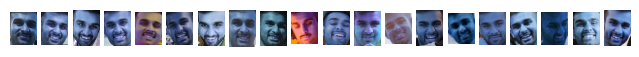

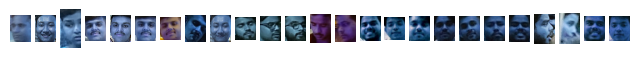

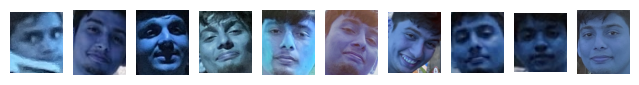

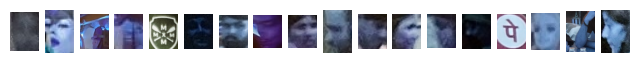

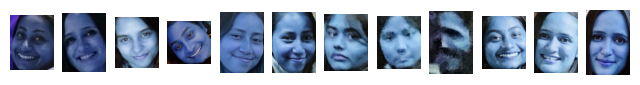

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval()

# Assuming you already have the 'extracted_faces' variable containing faces from your previous code
# Assuming you already have the 'embeddings' variable containing the face embeddings from the previous code

# Convert the list of embeddings to a numpy array
face_embeddings = np.array(embeddings)

# Perform K-means clustering to group faces based on similarity
num_clusters = 5  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(face_embeddings)

# Create dictionaries to store the grouped faces
face_groups = {}
for i, label in enumerate(labels):
    if label not in face_groups:
        face_groups[label] = []
    face_groups[label].append(extracted_faces[i])  # Store the face images in the corresponding group

# Display the grouped faces using matplotlib
for group_id, group_faces in face_groups.items():
    plt.figure(figsize=(8, 8))
    for i, face in enumerate(group_faces):
        plt.subplot(1, len(group_faces), i + 1)
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()


In [ ]:
#now trying with vggface
import tensorflow as tf
model2=tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [ ]:
#getting embeddings
import cv2
import numpy as np
import tensorflow as tf
from mtcnn import MTCNN

face_embeddings = []
def get_embeddings(faces):


    # Preprocess and get embeddings for each face
    for face in faces:
        face = cv2.resize(face, (224, 224))
        face = face.astype('float32') / 255.0
        face = np.expand_dims(face, axis=0)

        # Get face embedding using FaceNet model
        embedding = model2.predict(face)[0]
        face_embeddings.append(embedding)

    return face_embeddings
emb = get_embeddings(extracted_faces )

# Display the embeddings
for i, embedding in enumerate(emb):
    print(f"Embedding for Face {i+1}:")
    print(embedding)


Streaming output truncated to the last 5000 lines.
 2.06315285e-03 2.07231613e-03 5.71269216e-03 3.86176305e-03
 8.40422173e-04 4.01455909e-03 6.91453519e-04 8.09458783e-04
 2.12918792e-04 1.24605279e-03 1.28501665e-03 2.93177925e-03
 1.76395391e-04 2.80719530e-03 6.62880266e-05 1.79908107e-04
 4.34997288e-04 3.26134556e-04 7.15531525e-04 7.36982256e-05
 6.20937557e-04 2.81526009e-04 1.12047314e-03 1.13802950e-03
 3.18973965e-04 2.33093102e-04 2.67799129e-04 1.19830889e-03
 3.03134526e-04 1.26210332e-04 3.94487579e-04 7.53740896e-04
 6.02490269e-04 2.94096215e-04 6.14244418e-05 7.82263698e-04
 1.73759472e-03 6.07882277e-04 5.54157596e-04 4.98178269e-05
 1.14532486e-04 2.05825316e-03 3.94862844e-04 2.36493783e-04
 2.15656077e-03 4.75207053e-05 1.28887827e-04 1.05425672e-04
 1.96238677e-03 2.77629495e-03 1.73261226e-03 7.30671571e-04
 5.25606622e-04 9.75945906e-04 3.25411762e-04 6.08366798e-04
 3.27388244e-03 2.85028800e-04 6.07427675e-04 6.91628957e-05
 1.61497446e-04 1.37811014e-03 1.6

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval()

# Assuming you already have the 'extracted_faces' variable containing faces from your previous code
# Assuming you already have the 'embeddings' variable containing the face embeddings from the previous code

# Convert the list of embeddings to a numpy array
face_embeddings = np.array(emb)

# Perform K-means clustering to group faces based on similarity
num_clusters = 5  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(face_embeddings)

# Create dictionaries to store the grouped faces
face_groups = {}
for i, label in enumerate(labels):
    if label not in face_groups:
        face_groups[label] = []
    face_groups[label].append(extracted_faces[i])  # Store the face images in the corresponding group

# Display the grouped faces using matplotlib
for group_id, group_faces in face_groups.items():
    plt.figure(figsize=(8, 8))
    for i, face in enumerate(group_faces):
        plt.subplot(1, len(group_faces), i + 1)
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()


In [ ]:
#checking which is better vgg16 or facenet


In [ ]:
#os.mkdir("/content/drive/MyDrive/Part1")
input_folder = "/content/drive/MyDrive/positives"  # Replace "input_folder" with the actual folder path containing the images
output_folder = "/content/drive/MyDrive/Part1"  # Replace "output_folder" with the desired folder path to save the converted images

# Iterate over files in the input folder
for filename in os.listdir(input_folder):
    # Check if the file is an image (optional)
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Create the full file paths
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Load the image in BGR format
        image_bgr = cv2.imread(input_path)

        # Check if the image was loaded successfully
        if image_bgr is not None:
            # Convert BGR image to RGB
            image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

            # Save the converted image
            cv2.imwrite(output_path, image_rgb)

            print(f"Image {filename} converted and saved.")
        else:
            print(f"Error: Failed to load {filename}.")

#accessing the paths in a list
files=[]
for i in os.listdir(output_folder):
  img=os.path.join(output_folder,i)
  #image=cv2.imread(img)
  files.append(img)
files


In [ ]:
import os
import random

# Replace these with the actual paths to your image directories
folder1 = "/content/drive/MyDrive/Part1"  # Replace "input_folder" with the actual folder path containing the images
folder2 = "/content/drive/MyDrive/New"

# Function to get a list of image files from a directory
def get_image_files(directory):
    image_files = [file for file in os.listdir(directory) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    return image_files

# Load image files from both folders
images_folder1 = get_image_files(folder1)
images_folder2 = get_image_files(folder2)

# Prepare positive (same_person) pairs
positive_pairs = []
for i in range(min(len(images_folder1), len(images_folder2))):
    img1 = os.path.join(folder1, random.choice(images_folder1))
    img2 = os.path.join(folder1, random.choice(images_folder1))
    positive_pairs.append((img1, img2, True))

# Prepare negative (different_people) pairs
negative_pairs = []
for i in range(min(len(images_folder1), len(images_folder2))):
    img1 = os.path.join(folder1, random.choice(images_folder1))
    img2 = os.path.join(folder2, random.choice(images_folder2))
    negative_pairs.append((img1, img2, False))

# Combine positive and negative pairs
pairs = positive_pairs + negative_pairs

# Shuffle the pairs for randomization
random.shuffle(pairs)

# Print a sample of pairs
for img1, img2, same_person in pairs[:5]:
    print(f"Image 1: {img1}, Image 2: {img2}, Same Person: {same_person}")


Image 1: /content/drive/MyDrive/Part1/5.jpeg, Image 2: /content/drive/MyDrive/New/IMG_1736.jpeg, Same Person: False
Image 1: /content/drive/MyDrive/Part1/2.jpg, Image 2: /content/drive/MyDrive/Part1/13.jpeg, Same Person: True
Image 1: /content/drive/MyDrive/Part1/11.jpeg, Image 2: /content/drive/MyDrive/Part1/1.jpeg, Same Person: True
Image 1: /content/drive/MyDrive/Part1/14.jpg, Image 2: /content/drive/MyDrive/New/IMG_1539.jpeg, Same Person: False
Image 1: /content/drive/MyDrive/Part1/9.jpeg, Image 2: /content/drive/MyDrive/Part1/5.jpeg, Same Person: True


In [ ]:
pairs

[('/content/drive/MyDrive/Part1/5.jpeg',
  '/content/drive/MyDrive/New/IMG_1736.jpeg',
  False),
 ('/content/drive/MyDrive/Part1/2.jpg',
  '/content/drive/MyDrive/Part1/13.jpeg',
  True),
 ('/content/drive/MyDrive/Part1/11.jpeg',
  '/content/drive/MyDrive/Part1/1.jpeg',
  True),
 ('/content/drive/MyDrive/Part1/14.jpg',
  '/content/drive/MyDrive/New/IMG_1539.jpeg',
  False),
 ('/content/drive/MyDrive/Part1/9.jpeg',
  '/content/drive/MyDrive/Part1/5.jpeg',
  True),
 ('/content/drive/MyDrive/Part1/4.jpg',
  '/content/drive/MyDrive/New/IMG_5043.jpeg',
  False),
 ('/content/drive/MyDrive/Part1/11.jpeg',
  '/content/drive/MyDrive/Part1/6.jpeg',
  True),
 ('/content/drive/MyDrive/Part1/13.jpeg',
  '/content/drive/MyDrive/Part1/13.jpeg',
  True),
 ('/content/drive/MyDrive/Part1/12.jpeg',
  '/content/drive/MyDrive/Part1/14.jpg',
  True),
 ('/content/drive/MyDrive/Part1/11.jpeg',
  '/content/drive/MyDrive/New/23dd169e-5578-4d27-ba6a-8c6e9b8b9364.jpeg',
  False),
 ('/content/drive/MyDrive/Part1/9

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from facenet_pytorch import InceptionResnetV1
import cv2

# Load the VGG16 model (pre-trained on ImageNet)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load the FaceNet model
facenet_model = InceptionResnetV1(pretrained='vggface2').eval()

# Define a function to extract features using VGG16
def extract_vgg16_features(img):
    img=cv2.imread(img)
    img = cv2.resize(img, (224, 224))
    img = vgg16_preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    features = vgg16_model.predict(img)
    return features.flatten()

# Define a function to get embeddings using FaceNet
def get_facenet_embeddings(img):

    img=cv2.imread(img)
    img = cv2.resize(img, (160, 160))
    img = img.astype('float32') / 255.0
    img = np.transpose(img, (2, 0, 1))  # Convert from HWC to CHW format
    img = np.expand_dims(img, axis=0)
    embeddings = facenet_model(torch.tensor(img))
    return embeddings[0].detach().numpy()

# Prepare your data (positive and negative pairs)
# pairs = [ (img1, img2, same_person), ... ]

# Process the data and obtain predictions
vgg16_predictions = []
facenet_predictions = []
ground_truth = []

for img1, img2, same_person in pairs:
    vgg16_features_1 = extract_vgg16_features(img1)
    vgg16_features_2 = extract_vgg16_features(img2)
    vgg16_distance = np.linalg.norm(vgg16_features_1 - vgg16_features_2)
    vgg16_predictions.append(vgg16_distance)

    facenet_embedding_1 = get_facenet_embeddings(img1)
    facenet_embedding_2 = get_facenet_embeddings(img2)
    facenet_distance = np.linalg.norm(facenet_embedding_1 - facenet_embedding_2)
    facenet_predictions.append(facenet_distance)

    ground_truth.append(int(same_person))
threshold = 0.5
# Convert predictions to binary (0: different person, 1: same person)
vgg16_predictions = [1 if x < threshold else 0 for x in vgg16_predictions]
facenet_predictions = [1 if x < threshold else 0 for x in facenet_predictions]

# Calculate accuracy
vgg16_accuracy = accuracy_score(ground_truth, vgg16_predictions)
facenet_accuracy = accuracy_score(ground_truth, facenet_predictions)

print(f"VGG16 Accuracy: {vgg16_accuracy}")
print(f"FaceNet Accuracy: {facenet_accuracy}")


1/1 [==============================] - 1s 580ms/step
VGG16 Accuracy: 0.5357142857142857
FaceNet Accuracy: 0.5357142857142857
